In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
plt.style.use('ggplot')

# Clustering
_Marco Antonio Vino_

_CCD-La Paz_

# Intuición K-means

In [2]:
url = 'https://www.naftaliharris.com/blog/visualizing-k-means-clustering/'
IPython.display.HTML('<iframe src=' + url + ' width=700 height=350></iframe>')

## Algunos Ejemplos

In [3]:
Aggregation = pd.read_csv("data/Aggregation.txt", sep= "\t", names = ["x","y", "Ci"])
print(Aggregation.shape)
Aggregation.describe()

(788, 3)


,x,y,Ci
count,788.000000,788.000000,788.000000
mean,19.566815,14.171764,3.770305
std,9.922042,8.089683,1.596305
min,3.350000,1.950000,1.000000
25%,11.150000,7.037500,2.000000
50%,18.225000,11.725000,4.000000
75%,30.700000,21.962500,5.000000
max,36.550000,29.150000,7.000000


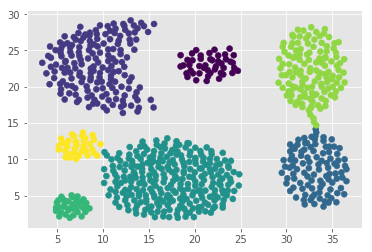

In [4]:
plt.scatter(Aggregation.x, Aggregation.y, c=Aggregation.Ci)

In [5]:
Jain = pd.read_csv("data/jain.txt", sep= "\t", names = ["x","y", "Ci"])
print(Jain.shape)
Jain.describe()

(373, 3)


,x,y,Ci
count,373.000000,373.000000,373.000000
mean,24.330697,12.145979,1.260054
std,9.853372,6.605375,0.439253
min,0.750000,2.950000,1.000000
25%,17.350000,6.300000,1.000000
50%,23.150000,11.250000,1.000000
75%,33.350000,16.500000,2.000000
max,41.300000,27.850000,2.000000


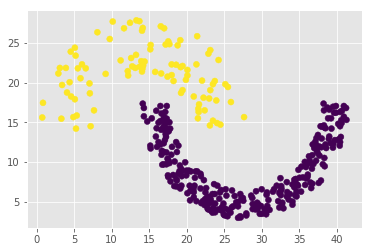

In [6]:
plt.scatter(Jain.x, Jain.y, c=Jain.Ci)
plt.show()

# Desarrollando K-Means
**Solamente para datos numéricos.** Definimos el dominio de cada una de los atributos que tenemos y estadarizamos los atributos para que se mantenga su valor.


Text(0.5,1,'Valores Normalizados')

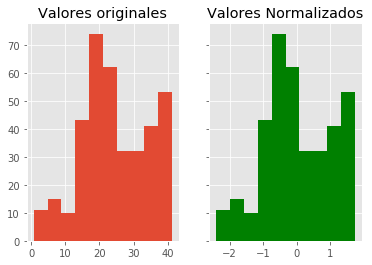

In [7]:
Jain_Norm = (Jain - Jain.mean())/Jain.std() ## Normalización de los valores
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(Jain.x)
ax1.set_title('Valores originales')
ax2.hist(Jain_Norm.x, color="g")
ax2.set_title('Valores Normalizados')

In [8]:
Jain_Norm.mean()

x     5.113574e-16
y     4.232539e-16
Ci   -1.407275e-15
dtype: float64

In [9]:
def normDF(df):
    """
    Normaliza los valores del dataframe que introducimos
    """
    return (df - df.mean())/df.std()

In [10]:
Jain_Norm = normDF(Jain.iloc[:,:-1])

In [11]:
Q = [[1,2,3], [4,2,2],[45,3,5], [45,34,4]]
Q = pd.DataFrame(Q)
Q

,0,1,2
0,1,2,3
1,4,2,2
2,45,3,5
3,45,34,4


## Función objetivo

$$ P(W,Q) = \sum_{l=1}^k \sum_{i=1}^n w_{i,l} \ d(X_i,Q_l)$$

Para calcular nuestra función objetivo necesitamos definir la funcion $d(X_i,Q_l)$ que lo haremos a traves de la distancia euclidiana.  



Para simplificar los cálculos, de la función objetivo la expresaremos de manera matricial. 

$$ P(W,Q) = tr( W' D(X,Q))$$

La funcion $D(X,Q)$, nos devolverá una matriz de $nxk$ dimensiones siendo cada elemento $d_{i,j}$ las distancias de la observación $i$ respecto a cluster $j$

In [12]:
def d(Xi, Qi):
    return np.sqrt(np.sum((Xi - Qi)**2))

def D(X,Q, d):
    D = []
    for q in range(Q.shape[0]): 
        qi = np.array(Q.iloc[q,:]) # Extrayendo cada centroide como un np.array
        D.append(X.apply(d,Qi = qi , axis =1))
    return pd.DataFrame(D).T    

In [13]:
D1 = D(Jain,Q, d)
D1

,0,1,2,3
0,15.483055,15.767847,46.551316,47.192425
1,13.639007,13.982936,46.106643,47.964805
2,13.681831,13.468203,43.622156,45.683613
3,12.957720,12.263870,41.406551,44.453374
4,14.231391,13.679638,42.154863,44.144450
5,14.551460,13.915639,41.788096,43.652549
6,16.450532,15.938005,42.696838,43.072265
7,16.674007,16.261073,43.286516,43.407632
8,17.054765,16.750075,43.976869,43.743171
9,17.889941,17.710167,44.927163,44.034645


#### Definiendo el calculo de la función de costo
$$ P(W,Q) = tr( W' D(X,Q))$$

In [14]:
def P(W,Di):
    return np.trace(W.T.values @ Di.values )   

El algoritmo consta de 2 problemas: 
### Problema 1:  
#### Asignar a un grupo cada una de las observaciones
$$ w_{i,l}  <- min(d(X_i, Q_l))$$

### Problema 2: 
### Reasignar los valores de los centroides
$$q_{l,j} = \frac{\sum_{i=1}^n w_{i,l} x_{i,j}}{ \sum_{i=1}^n w_{i,l}}$$

# Algoritmo
Sigue 3 pasos secuenciales

1.  Iniciamos los centroides aleatoriamente y asignamos cluster a cada observación

2.  Actualizamos los valores de los centroides

    If : $P(\hat{W}, Q^t) == P(\hat{W}, Q^{t+1})$, _break_
    
    
3.  Obtenemos nuevos valores de a que cluster corresponden las observaciones

    If : $P(W^t, \hat{Q}^t) == P(W^{t+1}, \hat{Q})$, _break_
    
    else : **volver al paso 2**
   

In [15]:
D1.head()

,0,1,2,3
0,15.483055,15.767847,46.551316,47.192425
1,13.639007,13.982936,46.106643,47.964805
2,13.681831,13.468203,43.622156,45.683613
3,12.957720,12.263870,41.406551,44.453374
4,14.231391,13.679638,42.154863,44.144450


In [16]:
# Asignamos mediante la mínima distancia
D1.idxmin(axis=1)

0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
343    2
344    2
345    2
346    2
347    2
348    2
349    2
350    2
351    2
352    2
353    2
354    2
355    2
356    2
357    2
358    2
359    2
360    2
361    2
362    2
363    2
364    2
365    2
366    2
367    2
368    2
369    2
370    2
371    2
372    2
Length: 373, dtype: int64

In [17]:
# Resolviendo el Problema 1
def solveP1(D,k):
    """
    Asignamos grupos a cada observación
    en base a la mínima distancia
    retorna W i ClId
    """
    ClId = D.idxmin(axis=1)
    W =  pd.get_dummies(ClId) 
    for cl in range(k):
        if cl not in W.columns:
            W[cl] = 0
    return W, ClId

In [18]:
W , ClId = solveP1(D1, 4)

In [19]:
W

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


### Problema 2:
#### Recalcular los centroides por grupo los centroides

In [20]:
for q in range(Q.shape[0]):
    print(Jain[np.where(ClId == q , True, False)].mean())

x      0.800
y     16.525
Ci     2.000
dtype: float64
x     16.961558
y     14.374874
Ci     1.412060
dtype: float64
x     33.755247
y      8.725000
Ci     1.018519
dtype: float64
x     23.005
y     22.335
Ci     2.000
dtype: float64


In [21]:
#Resolviendo el problema 2
def solveP2(X,Q,ClId):
    Q_a = []
    for q in range(Q.shape[0]):
        Q_a.append(X[np.where(ClId == q , True, False)].mean())
    return pd.DataFrame(Q_a)


In [22]:
Q

,0,1,2
0,1,2,3
1,4,2,2
2,45,3,5
3,45,34,4


In [23]:
solveP2(Jain,Q,ClId)

,x,y,Ci
0,0.800000,16.525000,2.000000
1,16.961558,14.374874,1.412060
2,33.755247,8.725000,1.018519
3,23.005000,22.335000,2.000000


# El Algoritmo 
En código

* P1. Inicializar los centroides de manera aleatoria, y calulamos $W^0$

In [24]:
# Paso 1 
def Qini(X,k):
    return  pd.DataFrame(np.random.randn(k,X.shape[1]))   

P_hist = []
k =3 
Qt = Qini(Jain_Norm,k)
Dt = D(Jain_Norm,Qt,d)
Wt, ClIdt = solveP1(Dt,k) # k =6 
Pt = P(Wt,Dt)
P_hist.append(Pt)

In [25]:
P_hist

[327.9664934132247]

In [26]:
#Paso 2
Q_t1 = solveP2(Jain_Norm,Qt,ClIdt) #  centroid
D_t1 = D(Jain_Norm,Q_t1,d)
P_t1 = P(Wt, D_t1)
P_hist.append(P_t1)
if Pt == P_t1:
    print("Aqui muere")

In [27]:
#Paso 3
W_t1, ClIdt = solveP1(D_t1,k) # Nueva Clasificación
Pt = P(W_t1, D_t1)
P_hist.append(Pt)
if Pt == P_t1:
    print("Aqui muere")
Qt = Q_t1.copy()
Wt = W_t1.copy()


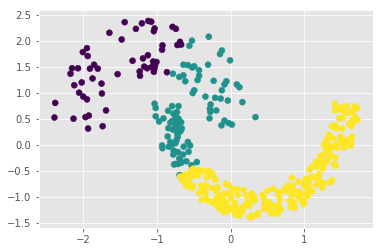

In [28]:
plt.scatter(Jain_Norm.x, Jain_Norm.y , c=ClIdt)

In [29]:
P_hist = []
k = 3
Qt = Qini(Jain_Norm,k)
Dt = D(Jain_Norm,Qt,d)
Wt, ClIdt = solveP1(Dt,k) # k =6 
Pt = P(Wt,Dt)
P_hist.append(Pt)
while True:
    #Paso 2
    Q_t1 = solveP2(Jain_Norm,Qt,ClIdt) #  centroida
    D_t1 = D(Jain_Norm,Q_t1,d)
    P_t1 = P(Wt, D_t1)
    P_hist.append(P_t1)
    if Pt == P_t1:
        print("Aqui muere")
        break

    #Paso 3
    W_t1, ClIdt = solveP1(D_t1,k) # Nueva Clasificación
    Pt = P(W_t1, D_t1)
    P_hist.append(Pt)
    if Pt == P_t1:
        print("Aqui muere")
        break
    Qt = Q_t1.copy()
    Wt = W_t1.copy()


Aqui muere


In [30]:
P_hist

[443.4794896423435,
 329.5509423178606,
 306.2841391753267,
 288.67511767118987,
 274.87343461371097,
 264.12874348174444,
 258.87273916411243,
 254.64691433960434,
 251.6763834209901,
 248.8091952903257,
 247.22518488860229,
 245.8352870533257,
 244.53509005643195,
 242.86018595613191,
 242.0220962380894,
 241.25998067030753,
 240.96626611830138,
 240.3448076655115,
 240.2817555495178,
 240.01523356039286,
 239.97234400237969,
 239.61991907171375,
 239.5708784916055,
 239.45929039160026,
 239.41235359657776,
 239.1108276359687,
 239.09160694904205,
 238.87300016621904,
 238.86689502386054,
 238.84444147696945,
 238.84444147696945]

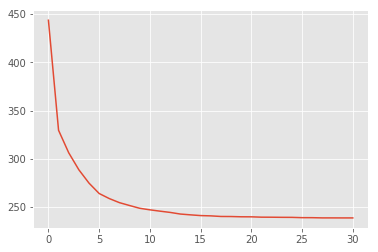

In [31]:
plt.plot(P_hist)

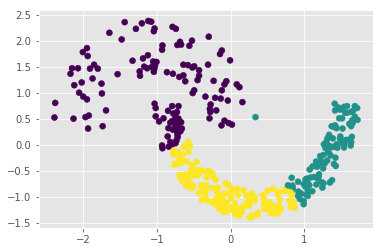

In [32]:
plt.scatter(Jain_Norm.x, Jain_Norm.y , c=ClIdt)

In [33]:
def kmeans(X,k,d):
    P_hist = []
    Qt = Qini(X,k)
    Dt = D(X,Qt,d)
    Wt, ClIdt = solveP1(Dt,k) # k =6 
    Pt = P(Wt,Dt)
    P_hist.append(Pt)
    while True:
        #Paso 2
        Q_t1 = solveP2(X,Qt,ClIdt) #  centroida
        D_t1 = D(X,Q_t1,d)
        P_t1 = P(Wt, D_t1)
        P_hist.append(P_t1)
        if Pt == P_t1:
            print("Aqui muere")
            break
        #Paso 3
        W_t1, ClIdt = solveP1(D_t1,k) # Nueva Clasificación
        Pt = P(W_t1, D_t1)
        P_hist.append(Pt)
        if Pt == P_t1:
            print("Aqui muere")
            break
        Qt = Q_t1.copy()
        Wt = W_t1.copy()
    return ClIdt, Wt

Aqui muere


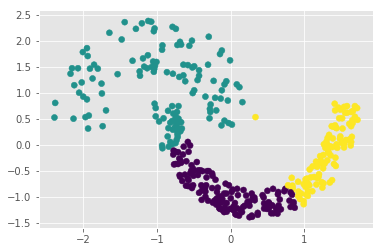

In [34]:
# Ejemplo 1 
Clusters , Wq = kmeans(Jain_Norm,3,d)
plt.scatter(Jain_Norm.x, Jain_Norm.y , c=Clusters)

Aqui muere


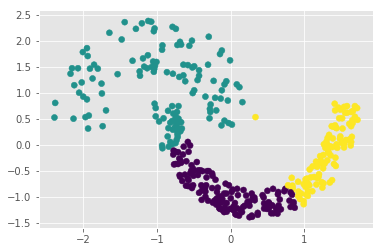

In [35]:
Clusters12, Wq = kmeans(Jain_Norm,2,d)
plt.scatter(Jain_Norm.x, Jain_Norm.y , c=Clusters)

In [36]:
Agg_Norm = normDF(Aggregation.iloc[:,:-1])

Aqui muere


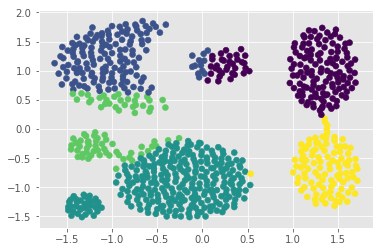

In [37]:
# Ejemplo 2
Clusters12, Wq = kmeans(Agg_Norm,5,d)
plt.scatter(Agg_Norm.x, Agg_Norm.y , c=Clusters12)

# K-modes
Enfocado en datos categóricos

Definiendo la nueva medida de disimilaridad de conteo

$$d_1(x,y) = \sum_{j=1}^m \delta(x_j, y_j)$$

$$\delta(x_j, y_j) = 0\ si\ (x_j== y_j)\ ,\ 1\ en\ otro\ caso$$

### El algoritmo de resolución se mantiene de la misma manera que en K-means

# Algoritmo
Sigue 3 pasos secuenciales

1.  Iniciamos los centroides aleatoriamente y asignamos cluster a cada observación

2.  Actualizamos los valores de los centroides

    If : $P(\hat{W}, Q^t) == P(\hat{W}, Q^{t+1})$, _break_
    
    
3.  Obtenemos nuevos valores de a que cluster corresponden las observaciones

    If : $P(W^t, \hat{Q}^t) == P(W^{t+1}, \hat{Q})$, _break_
    
    else : **volver al paso 2**
   

In [38]:
def d1(Xi, Qi):
    return np.sum(Xi == Qi)

In [39]:
def Dm(X,Q, d1):
    D = []
    for q in range(Q.shape[0]): 
        qi = np.array(Q.iloc[q,:]) # Extrayendo cada centroide como un np.array
        D.append(X.apply(d1,Qi = qi , axis =1))
    return pd.DataFrame(D).T    

In [40]:
def solveP2m(X,Q,ClId):
    Q_a = []
    for q in range(Q.shape[0]):
        Q_a.append(X[np.where(ClId == q , True, False)].mode().iloc[0,:])
    return pd.DataFrame(Q_a) 

In [41]:
TestKM = pd.DataFrame([["a","f","e","d"],["s","d","r","w"],['s','f','t','r'], ['a','r','f','w']])

In [42]:
TestKM.mode().iloc[0,:]

0    a
1    f
2    e
3    w
Name: 0, dtype: object

In [43]:
def QiniM(X,k):
    """
    Inicializa de manera aleatoria los k centroides
    con m dimensiones. 
    Considera el rango de las variables de X
    """
    Q = []
    for i in range(X.shape[1]):
        Q.append(np.random.choice(X.iloc[:,i],k))   
    return  pd.DataFrame(Q).T

In [44]:
TestKM

,0,1,2,3
0,a,f,e,d
1,s,d,r,w
2,s,f,t,r
3,a,r,f,w


In [45]:
Qm = QiniM(TestKM,2)
Qm

,0,1,2,3
0,s,f,e,w
1,s,d,r,d


In [46]:
D = []
for q in range(Qm.shape[0]): 
    qi = np.array(Qm.iloc[q,:]) # Extrayendo cada centroide como un np.array
    print(qi)
    D.append(TestKM.apply(d1,Qi = qi , axis =1))
TestKM.iloc[1,:]

['s' 'f' 'e' 'w']
['s' 'd' 'r' 'd']


0    s
1    d
2    r
3    w
Name: 1, dtype: object

In [47]:
def kmodes(X,k,d1, iterations = 1000):
    """
    Introducir los datos normalizados
    """
    s=1
    P_hist = []
    Qt = QiniM(X,k)
    Dt = Dm(X,Qt,d1)
    Wt, ClIdt = solveP1(Dt,k) # k =6 
    Pt = P(Wt,Dt)
    P_hist.append(Pt)
    while True:
        #Paso 2
        Q_t1 = solveP2m(X,Qt,ClIdt) #  centroide
        D_t1 = Dm(X,Q_t1,d1)
        P_t1 = P(Wt, D_t1)
        P_hist.append(P_t1)
        if Pt == P_t1:
            print("Aqui muere")
            break

        #Paso 3
        W_t1, ClIdt = solveP1(D_t1,k) # Nueva Clasificación
        Pt = P(W_t1, D_t1)
        P_hist.append(Pt)
        if Pt == P_t1:
            print("Aqui muere")
            break
        Qt = Q_t1.copy()
        Wt = W_t1.copy()
        if s%500 ==0:
            print("Iteracion: ", s)
        s+=1
        if s> iterations:
            break
    return ClIdt, Wt, P_hist

In [48]:
 ClIdt, Wt, P_hist = kmodes(TestKM,2,d1)

Iteracion:  500
Iteracion:  1000


In [49]:
print(ClIdt)
TestKM

0    1
1    0
2    0
3    1
dtype: int64


,0,1,2,3
0,a,f,e,d
1,s,d,r,w
2,s,f,t,r
3,a,r,f,w


# DBSCAN
Density-based spatial clustering of applications with noise

# Intuición DBSCAN

In [50]:
url = 'https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/'

IPython.display.HTML('<iframe src=' + url + ' width=700 height=350></iframe>')

## Elementos que pertenecen al cluster 
$$ N_{\epsilon}(p) = \{q \in D \ |\  dist(p,q) < \epsilon\} $$

Se consideran 2 hiper parámetros: $\epsilon$ y el número mínimo de elementos

In [51]:
def dist(p,q):
    """
    distancia euclidiana
    """
    return np.sqrt(np.sum((p - q)**2))

In [52]:
def NepsP(X,p, eps):
    """
    El subconjunto de puntos que complen con la condición
    menor que epsilon
    """
    D = X.apply(dist,q = X.iloc[p,:]  , axis =1)
    return list(D[D<=eps].index)

## El algoritmo 

**Para cada observación:**

    If : el punto no ha sido clasificado

            Expandir Cluster 

            next Cluster ID

In [53]:
D = Jain.apply(dist,q = Jain.iloc[3,:]  , axis =1)
type(D[D<=2].index)

pandas.core.indexes.numeric.Int64Index

In [54]:
NepsP(Jain,6,3)

[4, 5, 6, 7, 8, 9, 13, 15, 16, 17, 18]

In [55]:
def ExpendCluster(D,point,ClID,eps, MinPts):
    seeds = NepsP(D,point,eps)
    if len(seeds) < MinPts:
        Clusters[point] = -1
        return False
    else: 
        print("\nCon la semilla" , ClID)
        Clusters[seeds] = ClID
        seeds.remove(point)
        print("ingresando al punto: ", end=" ")
        while seeds:
            currentP = seeds[0]
            result = NepsP(D,currentP,eps)
            if len(result) >= MinPts:
                print(currentP, end=" ")
                for i in result:
                    if Clusters[i] <= 0:
                        if Clusters[i] == 0:
                            seeds.append(i)
                        Clusters[i] = ClID
            seeds.remove(currentP)           
        return True
        

In [56]:
D = Aggregation

In [ ]:
Clusters = np.zeros(D.shape[0])
ClID = 1
for point in range(len(Clusters)):
    if Clusters[point] ==0:
        if ExpendCluster(D,point,ClID,2.5,7):
            ClID +=1


Con la semilla 1
ingresando al punto:  1 2 3 4 5 7 6 8 9 15 10 11 12 14 16 17 18 19 13 25 26 27 20 24 28 29 30 21 23 31 32 22 33 34 35 131 48 52 51 53 130 54 129 132 37 38 45 46 47 133 134 144 50 55 56 39 40 49 36 41 43 44 59 125 128 135 145 57 58 72 124 81 123 127 136 126 137 122 138 143 146 42 60 61 65 70 71 142 147 148 139 155 164 82 83 96 121 62 63 64 66 67 73 80 120 140 141 153 163 84 79 85 97 98 86 93 94 95 99 110 149 111 113 150 152 154 162 68 69 74 75 77 151 156 157 112 114 159 160 161 165 87 92 100 101 102 76 78 107 109 115 116 118 158 167 88 89 91 90 103 104 106 108 119 117 169 166 168 105 
Con la semilla 2
ingresando al punto:  171 172 173 174 175 176 177 178 185 186 187 188 189 190 191 199 200 202 198 201 203 180 184 192 179 181 182 183 193 194 195 197 196 
Con la semilla 3
ingresando al punto:  205 206 207 208 209 210 211 212 227 229 230 231 228 232 234 235 236 237 213 214 226 215 238 233 239 240 243 242 244 246 245 247 216 217 224 225 248 249 250 260 257 261 264 267 241 

In [ ]:
pd.crosstab(Clusters,columns="Freq")

In [ ]:
plt.scatter(D.x,D.y, c=Clusters, cmap="Spectral")
plt.scatter(D.x[Clusters == -1],D.y[Clusters == -1], c="Black") #Valores dispersos

In [ ]:
def DBSCAN(D,eps,MinPts):
    Clusters = np.zeros(D.shape[0])
    ClID = 1
    for point in range(len(Clusters)):
        if Clusters[point] ==0:
            if ExpendCluster(D,point,ClID,eps,MinPts):
                ClID +=1
    print("Finalizó la calsificación")
    return Clusters